### SPRINT1-UNDERSTANDING THE DATA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!unzip '/content/MNIST-dataset.zip'

Archive:  /content/MNIST-dataset.zip
  inflating: mnist_test.csv          
  inflating: mnist_train.csv         


1.Import the required libraries


In [ ]:
import numpy
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense ,Flatten
from tensorflow.keras.layers import Conv2D
from keras.optimizers import Adam
from keras.utils import np_utils

2.Loading the data

In [ ]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


3.Analyzing the data


In [ ]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
y_train[0]

5

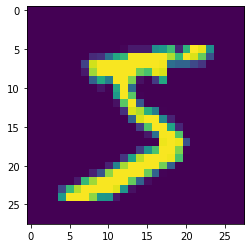

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])

4.Reshaping the dataset

In [ ]:
x_train=x_train.reshape(60000, 28, 28, 1).astype('float32')
x_test=x_test.reshape(10000, 28, 28, 1).astype('float32')

5.One hot Encoding

In [ ]:
number_of_classes=10
y_train=np_utils.to_categorical(y_train, number_of_classes)
y_test=np_utils.to_categorical(y_test, number_of_classes)

In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

### SPRINT2-MODEL BUILDING

1.Add CNN Layers

In [ ]:
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(28,28,1),activation='relu'))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(Flatten())
model.add(Dense(number_of_classes,activation='softmax'))


2.Compiling the model

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer="Adam",metrics=['accuracy'])

3.Train the model

In [ ]:
model.fit(x_train,y_train, validation_data=(x_test,y_test),epochs=5,batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 206s 110ms/step - loss: 0.2227 - accuracy: 0.9514 - val_loss: 0.0926 - val_accuracy: 0.9724
Epoch 2/5
1875/1875 [==============================] - 204s 109ms/step - loss: 0.0673 - accuracy: 0.9797 - val_loss: 0.0760 - val_accuracy: 0.9785
Epoch 3/5
1875/1875 [==============================] - 205s 110ms/step - loss: 0.0498 - accuracy: 0.9845 - val_loss: 0.0762 - val_accuracy: 0.9782
Epoch 4/5
1875/1875 [==============================] - 205s 109ms/step - loss: 0.0382 - accuracy: 0.9876 - val_loss: 0.0862 - val_accuracy: 0.9768
Epoch 5/5
1875/1875 [==============================] - 204s 109ms/step - loss: 0.0283 - accuracy: 0.9907 - val_loss: 0.1046 - val_accuracy: 0.9736


4.Observing the metics

In [ ]:
metrics=model.evaluate(x_test,y_test,verbose=0)
print("Metrics(Test loss & Test Accuracy): ")
print(metrics)

Metrics(Test loss & Test Accuracy): 
[0.10460703074932098, 0.9735999703407288]


5.Test the model

In [ ]:
prediction=model.predict(x_test[:4])
print(prediction)

1/1 [==============================] - 0s 91ms/step
[[3.6472027e-11 1.8582895e-13 7.9937044e-09 2.3997129e-07 3.9091824e-12
  9.8365305e-13 4.0152365e-19 9.9999976e-01 5.9545853e-09 8.3152724e-10]
 [3.1028864e-09 5.5525727e-12 9.9999976e-01 1.7234969e-11 1.0659495e-14
  5.0801370e-17 1.8960891e-07 3.2174923e-14 3.2996175e-09 1.8095494e-16]
 [7.9788151e-08 9.9954069e-01 1.4380501e-04 1.4463420e-08 1.5428855e-05
  1.7991129e-06 2.8585680e-04 2.7907413e-06 9.5048990e-06 2.0894759e-09]
 [9.9999964e-01 1.0304377e-14 1.9850519e-09 1.1107865e-14 4.1492143e-13
  1.5067174e-10 2.2719024e-07 2.5433347e-13 7.0791955e-08 8.9261853e-08]]


In [ ]:
import numpy as np
print(np.argmax(prediction,axis=1))
print(y_test[:4])

[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


6.Observing the metics

In [ ]:
metrics=model.evaluate(x_test,y_test,verbose=0)
print("Metrics(Test loss & Test Accuracy): ")
print(metrics)

Metrics(Test loss & Test Accuracy): 
[0.10460703074932098, 0.9735999703407288]


7.Test the model

In [ ]:
prediction=model.predict(x_test[:4])
print(prediction)

1/1 [==============================] - 0s 20ms/step
[[3.6472027e-11 1.8582895e-13 7.9937044e-09 2.3997129e-07 3.9091824e-12
  9.8365305e-13 4.0152365e-19 9.9999976e-01 5.9545853e-09 8.3152724e-10]
 [3.1028864e-09 5.5525727e-12 9.9999976e-01 1.7234969e-11 1.0659495e-14
  5.0801370e-17 1.8960891e-07 3.2174923e-14 3.2996175e-09 1.8095494e-16]
 [7.9788151e-08 9.9954069e-01 1.4380501e-04 1.4463420e-08 1.5428855e-05
  1.7991129e-06 2.8585680e-04 2.7907413e-06 9.5048990e-06 2.0894759e-09]
 [9.9999964e-01 1.0304377e-14 1.9850519e-09 1.1107865e-14 4.1492143e-13
  1.5067174e-10 2.2719024e-07 2.5433347e-13 7.0791955e-08 8.9261853e-08]]


In [ ]:
import numpy as np
print(np.argmax(prediction,axis=1))
print(y_test[:4])

[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


8.Save the model

In [ ]:
model.save('models/mnistCNN.h5')


In [ ]:
!tar -zcvf Digit-Model.tgz mnistCNN.h5

mnistCNN.h5


IBM DEPLOYMENT

In [ ]:
!pip install watson-machine-learning-client

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 538 kB 23.6 MB/s 
     |████████████████████████████████| 132 kB 43.8 MB/s 
     |████████████████████████████████| 55 kB 3.7 MB/s 
     |████████████████████████████████| 9.9 MB 44.6 MB/s 
     |████████████████████████████████| 79 kB 7.2 MB/s 
     |████████████████████████████████| 140 kB 63.0 MB/s 
     |████████████████████████████████| 956 kB 64.5 MB/s 
     |████████████████████████████████| 135 kB 56.4 MB/s 
     |████████████████████████████████| 62 kB 1.3 MB/s 
  Created wheel for ibm-cos-sdk: filename=ibm_cos_sdk-2.12.0-py3-none-any.whl size=73931 sha256=3c1e1853c51f05f29850f038c9879d9c48a399f50859c48457497e4a8f28909f
  Stored in directory: /root/.cache/pip/wheels/ec/94/29/2b57327cf00664b6614304f7958abd29d77ea0e5bbece2ea57
  Created wheel for ibm-cos-sdk-core: filename=ibm_cos_sdk_core-2.12.0-py3-none-any.whl size=562962 sha256=8116a86622

In [ ]:
!pip install ibm_watson_machine_learning

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 33.0 MB/s 
     |████████████████████████████████| 51 kB 714 kB/s 
     |████████████████████████████████| 824 kB 53.6 MB/s 
     |████████████████████████████████| 133 kB 50.7 MB/s 
     |████████████████████████████████| 547 kB 68.0 MB/s 
  Created wheel for ibm-cos-sdk: filename=ibm_cos_sdk-2.7.0-py2.py3-none-any.whl size=72563 sha256=3ebe2a9d09b12b8064775dedf9a38065f8e4381582d089b8c90a5b900959d9a8
  Stored in directory: /root/.cache/pip/wheels/47/22/bf/e1154ff0f5de93cc477acd0ca69abfbb8b799c5b28a66b44c2
  Created wheel for ibm-cos-sdk-core: filename=ibm_cos_sdk_core-2.7.0-py2.py3-none-any.whl size=501013 sha256=802d2cc970bc4cd21cc2fb09e0090a13bd007e6015cb73be3287a6ec3a38ba08
  Stored in directory: /root/.cache/pip/wheels/6c/a2/e4/c16d02f809a3ea998e17cfd02c13369281f3d232aaf5902c19
  Created wheel for ibm-cos-sdk-s3transfer: filename=ibm_cos

In [ ]:
from ibm_watson_machine_learning import APIClient
wml_credentials = {
    "url":"https://eu-gb.ml.cloud.ibm.com",
    "apikey":"jvy5eD0w7y5bbEqwjgb3hPV1qs6Um37N7J2ROWZBiPXY"
}

client=APIClient(wml_credentials)
client

Python 3.7 and 3.8 frameworks are deprecated and will be removed in a future release. Use Python 3.9 framework instead.


In [ ]:
client.spaces.get_details()

{'resources': [{'entity': {'compute': [{'crn': 'crn:v1:bluemix:public:pm-20:eu-gb:a/2a8885b5d5d04a1f8fe11f33c481e032:2c932db9-734f-487f-9ba1-27cc4f865682::',
      'guid': '2c932db9-734f-487f-9ba1-27cc4f865682',
      'name': 'Watson Machine Learning-ek',
      'type': 'machine_learning'}],
    'description': '',
    'name': 'Novel Method',
    'scope': {'bss_account_id': '2a8885b5d5d04a1f8fe11f33c481e032'},
    'stage': {'production': False},
    'status': {'state': 'active'},
    'storage': {'properties': {'bucket_name': 'aa2c867a-281f-4f64-8ca5-1388462f3e8d',
      'bucket_region': 'eu-gb-standard',
      'credentials': {'admin': {'access_key_id': '69c872b8ebca43daa74910466b0163a0',
        'api_key': 'jkKm0DaWpvTGWMfuKlBNRkktWcHaHMiCgmB8nPqbdgi3',
        'secret_access_key': '4ef677aeaf64f2ac440a043ea60d79ac76dcd5d8e010ffaa',
        'service_id': 'ServiceId-84b77ca1-d301-4871-af77-870dc7eec585'},
       'editor': {'access_key_id': '4a1ac6f50f2f44ac8682bf6fcb609f7f',
        'api_

In [ ]:
client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  ------------  ------------------------
ID                                    NAME          CREATED
c042954f-ef7e-44d4-ac6b-904b3f29ed31  Novel Method  2022-11-11T12:06:17.400Z
------------------------------------  ------------  ------------------------


In [ ]:
space_uid ="c042954f-ef7e-44d4-ac6b-904b3f29ed31"
space_uid

'c042954f-ef7e-44d4-ac6b-904b3f29ed31'

In [ ]:
client.set.default_space(space_uid)

'SUCCESS'

In [ ]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [ ]:
software_space_id = client.software_specifications.get_uid_by_name('tensorflow_rt22.1-py3.9')
software_space_id

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [ ]:
from ibm_watson_machine_learning.repository import ModelMetaNames
model_details = client.repository.store_model(model ='/content/Digit-Model.tgz', meta_props={
    client.repository.ModelMetaNames.NAME:"HandWritten Digit",
    client.repository.ModelMetaNames.TYPE:'tensorflow_2.7',
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_space_id
})

In [ ]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'software_spec': {'id': 'acd9c798-6974-5d2f-a657-ce06e986df4d',
   'name': 'tensorflow_rt22.1-py3.9'},
  'type': 'tensorflow_2.7'},
 'metadata': {'created_at': '2022-11-11T13:54:04.498Z',
  'id': '777041f1-532a-4e18-8173-82fa26f7bf4a',
  'modified_at': '2022-11-11T13:54:08.231Z',
  'name': 'HandWritten Digit',
  'owner': 'IBMid-665002L1U6',
  'resource_key': '483b2fee-2e4b-4c99-a7a9-dda728de2850',
  'space_id': 'c042954f-ef7e-44d4-ac6b-904b3f29ed31'},
 'system': {'warnings': []}}

In [ ]:
model_id = client.repository.get_model_id(model_details)
model_id

'777041f1-532a-4e18-8173-82fa26f7bf4a'

In [ ]:
client.repository.download(model_id, 'RECOGNITION_SYSTEM.tar.gb')

Successfully saved model content to file: 'RECOGNITION_SYSTEM.tar.gb'


'/content/RECOGNITION_SYSTEM.tar.gb'